In [1]:
import numpy as np
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score


In [2]:
df = pd.read_csv('D2.csv')
df

,gender,age,height,weight,blood_type,insurance,income,race,immigrant,smoking,alcohol,contacts_count,house_count,working,worried,covid19_positive
0,male,30_40,174,64,bp,yes,med,white,native,never,3.0132,7.725594,2.0,never,4,1
1,male,30_40,182,118,unknown,yes,med,white,native,never,0.0000,7.725594,3.0,never,4,1
2,male,30_40,184,118,unknown,yes,med,white,native,never,0.0000,7.725594,3.0,never,4,1
3,female,70_80,164,72,unknown,yes,med,white,native,never,14.0000,7.725594,3.0,never,4,1
4,male,30_40,192,92,unknown,yes,med,white,native,never,0.0000,7.725594,1.0,never,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6105,male,40_50,174,72,unknown,yes,med,white,native,yesheavy,3.0132,5.000000,3.0,travel critical,5,0
6106,female,20_30,164,130,on,no,med,white,native,never,3.0132,21.000000,4.0,never,5,0
6107,female,20_30,162,56,bp,yes,low,mixed,native,vape,0.0000,10.000000,3.0,travel non critical,3,0
6108,female,40_50,158,70,bp,yes,med,asian,immigrant,quit5,3.0132,14.000000,1.0,travel critical,5,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6110 entries, 0 to 6109
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            6110 non-null   object 
 1   age               6110 non-null   object 
 2   height            6110 non-null   int64  
 3   weight            6110 non-null   int64  
 4   blood_type        6110 non-null   object 
 5   insurance         6110 non-null   object 
 6   income            6110 non-null   object 
 7   race              6110 non-null   object 
 8   immigrant         6110 non-null   object 
 9   smoking           6110 non-null   object 
 10  alcohol           6110 non-null   float64
 11  contacts_count    6110 non-null   float64
 12  house_count       6110 non-null   float64
 13  working           6110 non-null   object 
 14  worried           6110 non-null   int64  
 15  covid19_positive  6110 non-null   int64  
dtypes: float64(3), int64(4), object(9)
memory 

In [4]:
from test import data_prep 
df,X,y,X_train, X_test, y_train, y_test = data_prep()

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6110 entries, 0 to 6109
Data columns (total 74 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   height                       6110 non-null   int64
 1   weight                       6110 non-null   int64
 2   insurance                    6110 non-null   int64
 3   immigrant                    6110 non-null   int64
 4   contacts_count               6110 non-null   int64
 5   house_count                  6110 non-null   int64
 6   covid19_positive             6110 non-null   int64
 7   gender_female                6110 non-null   uint8
 8   gender_male                  6110 non-null   uint8
 9   gender_other                 6110 non-null   uint8
 10  age_0_10                     6110 non-null   uint8
 11  age_100_110                  6110 non-null   uint8
 12  age_10_20                    6110 non-null   uint8
 13  age_20_30                    6110 non-null   uin

In [6]:
rs = 10
# simple decision tree training
model = DecisionTreeClassifier(random_state=rs)
model.fit(X_train, y_train)

# print model parameters
print(model.get_params(deep = True))

{'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': 10, 'splitter': 'best'}


In [7]:
from sklearn.tree import DecisionTreeClassifier


# Get number of nodes
num_nodes = model.tree_.node_count
print("Number of nodes: ", num_nodes)

# Get number of leaves
num_leaves = sum(model.tree_.children_left == -1)
print("Number of leaves: ", num_leaves)


Number of nodes:  2007
Number of leaves:  1004


In [8]:
print("Train accuracy:", model.score(X_train, y_train))

Train accuracy: 1.0


In [9]:
print("Test accuracy:", model.score(X_test, y_test))

Test accuracy: 0.6481178396072013


In [10]:
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.70      0.70      0.70      1070
           1       0.58      0.57      0.57       763

    accuracy                           0.65      1833
   macro avg       0.64      0.64      0.64      1833
weighted avg       0.65      0.65      0.65      1833



In [11]:
# grab feature importances from the model and feature name from the original X
importances = model.feature_importances_
feature_names = X.columns

# sort them out in descending order
indices = np.argsort(importances)
indices = np.flip(indices, axis=0)

# limit to 20 features, you can leave this out to print out everything
indices = indices[:20]

for i in indices:
    print(feature_names[i], ':', importances[i])

weight : 0.09708752046264896
income_high : 0.09381629165155811
height : 0.09207993726642964
contacts_count : 0.07960698131179095
house_count : 0.06706537466744741
worried_4 : 0.04946894172532085
age_50_60 : 0.021556212727903822
blood_type_unknown : 0.019363642098491434
insurance : 0.015964609334714615
gender_female : 0.015696655959072207
age_30_40 : 0.014570407392178313
age_40_50 : 0.013816432995812391
working_never : 0.013800675574145889
alcohol_3.013200498 : 0.013425659991573538
age_60_70 : 0.013396835123216834
blood_type_ap : 0.013066406300867245
immigrant : 0.012943830945151398
working_stopped : 0.012803211095326172
age_20_30 : 0.012690741989392783
working_travel critical : 0.01266630401646082


In [12]:
import os
os.environ["PATH"] += os.pathsep + '/opt/homebrew/bin/'

import pydot
from io import StringIO
from sklearn.tree import export_graphviz

# visualize
dotfile = StringIO()
export_graphviz(model, out_file=dotfile, feature_names=X.columns)
graph = pydot.graph_from_dot_data(dotfile.getvalue())
graph[0].write_png("dt_viz.png") # saved in the following file


In [13]:
#retrain with a small max_depth limit

model_small = DecisionTreeClassifier(max_depth=3, random_state=rs)
model_small.fit(X_train, y_train)

print("Train accuracy:", model_small.score(X_train, y_train))
print("Test accuracy:", model_small.score(X_test, y_test))

y_pred = model_small.predict(X_test)
print(classification_report(y_test, y_pred))

Train accuracy: 0.7004909983633388
Test accuracy: 0.6999454446262957
              precision    recall  f1-score   support

           0       0.73      0.77      0.75      1070
           1       0.65      0.61      0.63       763

    accuracy                           0.70      1833
   macro avg       0.69      0.69      0.69      1833
weighted avg       0.70      0.70      0.70      1833



In [14]:
import os
os.environ["PATH"] += os.pathsep + '/opt/homebrew/bin/'

# visualize
dotfile = StringIO()
export_graphviz(model_small, out_file=dotfile, feature_names=X.columns)
graph = pydot.graph_from_dot_data(dotfile.getvalue())
graph[0].write_png("dt_small_viz.png") # saved in the following file

# Performing GridSearchCV

In [15]:
from sklearn.model_selection import GridSearchCV

In [16]:
# grid search CV
params = {'criterion': ['gini', 'entropy'],
          'max_depth': range(1, 16),
          'min_samples_leaf': range(0, 25, 5)[1:]}

cv_1 = GridSearchCV(param_grid=params, estimator=DecisionTreeClassifier(random_state=rs),return_train_score=True, cv=10)
cv_1.fit(X_train, y_train)

result_set = cv_1.cv_results_
print(result_set)


{'mean_fit_time': array([0.00352013, 0.00290742, 0.00289094, 0.0028851 , 0.00458059,
       0.00456047, 0.00456975, 0.00456152, 0.00617959, 0.00617795,
       0.00617626, 0.00617733, 0.00777798, 0.00775847, 0.00776293,
       0.00774744, 0.00937386, 0.00933127, 0.00928469, 0.00924838,
       0.01093707, 0.01083589, 0.01073647, 0.01065512, 0.0124845 ,
       0.01234837, 0.01231515, 0.01212804, 0.01417549, 0.01374931,
       0.01351516, 0.01320813, 0.01556742, 0.01491504, 0.0144959 ,
       0.01450684, 0.01695163, 0.0161948 , 0.01570203, 0.01491649,
       0.01803377, 0.01703608, 0.01619756, 0.01545782, 0.0190717 ,
       0.01781564, 0.01677189, 0.01598589, 0.0199508 , 0.01848693,
       0.0173594 , 0.01634829, 0.02080362, 0.01900239, 0.01769388,
       0.01649768, 0.02136927, 0.02003016, 0.01827981, 0.01672966,
       0.00288513, 0.00287428, 0.00287564, 0.00286539, 0.00459852,
       0.00460033, 0.0046072 , 0.0046047 , 0.0063396 , 0.00630105,
       0.00627317, 0.00625973, 0.00790889, 0

In [17]:
train_result = result_set['split0_train_score']
test_result = result_set['split0_test_score']
print("Total number of models: ", len(test_result))

Total number of models:  120


In [18]:
cv_1.best_estimator_.tree_.node_count

137

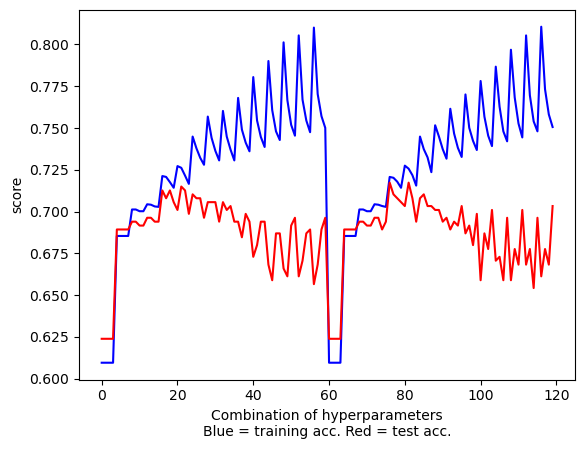

In [19]:
import matplotlib.pyplot as plt

# plot max depth hyperparameter values vs training and test accuracy score
plt.plot(range(0, len(train_result)), train_result, 'b', range(0,len(test_result)), test_result, 'r')
plt.xlabel('Combination of hyperparameters\nBlue = training acc. Red = test acc.')
plt.ylabel('score')
plt.show()

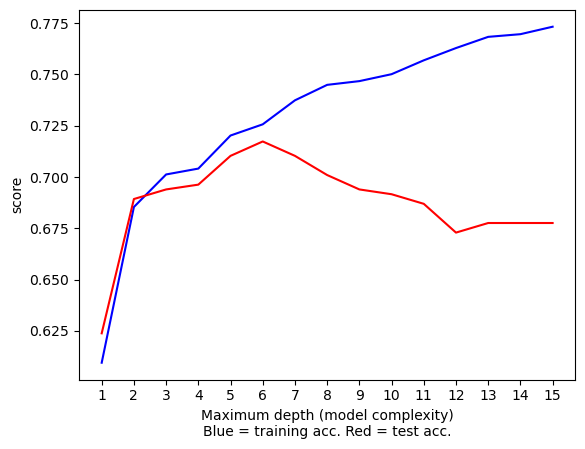

In [20]:
result_set['params']
dd = pd.DataFrame(result_set['params'])

index_ = list(dd.index[(dd['criterion']=='entropy') & (dd['min_samples_leaf']==10)])
max_depth_train = []
max_depth_test = []
for i in range(0,len(index_)):
    max_depth_train.append(train_result[index_[i]])
    max_depth_test.append(test_result[index_[i]])
plt.plot(range(1, len(max_depth_train)+1), max_depth_train, 'b', range(1,len(max_depth_test)+1), max_depth_test, 'r')
plt.xlabel('Maximum depth (model complexity)\nBlue = training acc. Red = test acc.')
plt.ylabel('score')
plt.xticks(np.arange(1, len(max_depth_train)+1, 1))
plt.show()

In [21]:
print(cv_1.best_params_)

{'criterion': 'gini', 'max_depth': 7, 'min_samples_leaf': 5}


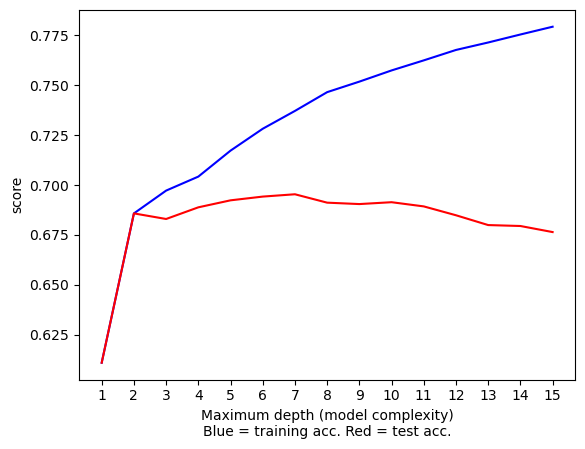

In [22]:
train_result = result_set['mean_train_score']
test_result = result_set['mean_test_score']

max_depth_train = []
max_depth_test = []
index_
for i in range(len(index_)):
    max_depth_train.append(train_result[index_[i]])
    max_depth_test.append(test_result[index_[i]])
plt.plot(range(1, len(max_depth_train)+1), max_depth_train, 'b', range(1,len(max_depth_test)+1), max_depth_test, 'r')
plt.xlabel('Maximum depth (model complexity)\nBlue = training acc. Red = test acc.')
plt.xticks(np.arange(1, len(max_depth_train)+1, 1))
plt.ylabel('score')
plt.show()

In [23]:
cv_1.fit(X_train, y_train)

print("Train accuracy:", cv_1.score(X_train, y_train))
print("Test accuracy:", cv_1.score(X_test, y_test))

y_pred = cv_1.best_estimator_.predict(X_test)
print(classification_report(y_test, y_pred))

Train accuracy: 0.7409399111526771
Test accuracy: 0.7119476268412439
              precision    recall  f1-score   support

           0       0.74      0.79      0.76      1070
           1       0.67      0.60      0.63       763

    accuracy                           0.71      1833
   macro avg       0.70      0.70      0.70      1833
weighted avg       0.71      0.71      0.71      1833



In [24]:
# Get number of nodes
num_nodes = cv_1.best_estimator_.tree_.node_count
print("Number of nodes: ", num_nodes)

# Get number of leaves
num_leaves = sum(cv_1.best_estimator_.tree_.children_left == -1)
print("Number of leaves: ", num_leaves)


Number of nodes:  137
Number of leaves:  69


In [25]:
# do the feature importance and visualization analysis on GridSearchCV
from test import analyse_feature_importance, visualize_decision_tree

analyse_feature_importance(cv_1.best_estimator_, X.columns, 20)
visualize_decision_tree(cv_1.best_estimator_, X.columns, "optimal_tree.png")

income_high : 0.34872370327525587
worried_4 : 0.17358118643050438
contacts_count : 0.06253753156021653
weight : 0.05905449496889916
insurance : 0.042566333400747454
age_90_100 : 0.03594748670892724
income_med : 0.03261246766501817
house_count : 0.03080801251684309
alcohol_3.013200498 : 0.027620018687811807
height : 0.0253540709215135
age_60_70 : 0.02278022300455977
age_80_90 : 0.01850049861484965
working_never : 0.014318373983829397
race_white : 0.014207934758972751
blood_type_abp : 0.012711737464550413
immigrant : 0.007080664064990596
worried_2 : 0.007032761092925618
working_travel critical : 0.007006217533884044
alcohol_1.0 : 0.006814198342017047
race_mixed : 0.006245251326428939


In [26]:
dt_cv_best = cv_1.best_estimator_
# probability prediction from decision tree
y_pred_proba_dt = dt_cv_best.predict_proba(X_test)

print("Probability produced by decision tree for each class vs actual prediction on Covid-19 Positive (0 = negative, 1 = positive). You should be able to see the default threshold of 0.5.")
print("(Probs on zero)\t(probs on one)\t(prediction made)")
# print top 10
for i in range(20):
    print(y_pred_proba_dt[i][0], '\t', y_pred_proba_dt[i][1], '\t', y_pred[i])

Probability produced by decision tree for each class vs actual prediction on Covid-19 Positive (0 = negative, 1 = positive). You should be able to see the default threshold of 0.5.
(Probs on zero)	(probs on one)	(prediction made)
0.4419889502762431 	 0.5580110497237569 	 1
0.8336079077429983 	 0.16639209225700163 	 0
0.9262820512820513 	 0.07371794871794872 	 0
0.8336079077429983 	 0.16639209225700163 	 0
0.298159509202454 	 0.701840490797546 	 1
0.8604651162790697 	 0.13953488372093023 	 0
0.298159509202454 	 0.701840490797546 	 1
0.298159509202454 	 0.701840490797546 	 1
0.7857142857142857 	 0.21428571428571427 	 0
0.8705882352941177 	 0.12941176470588237 	 0
0.6941176470588235 	 0.3058823529411765 	 0
0.298159509202454 	 0.701840490797546 	 1
0.298159509202454 	 0.701840490797546 	 1
0.738255033557047 	 0.26174496644295303 	 0
0.6674418604651163 	 0.3325581395348837 	 0
0.298159509202454 	 0.701840490797546 	 1
0.6674418604651163 	 0.3325581395348837 	 0
0.298159509202454 	 0.701840

In [27]:
# probability prediction from decision tree
y_pred_proba_dt_default = model.predict_proba(X_test)

print("Probability produced by decision tree for each class vs actual prediction on Covid-19 Positive (0 = negative, 1 = positive). You should be able to see the default threshold of 0.5.")
print("(Probs on zero)\t(probs on one)\t(prediction made)")
# print top 10
for i in range(20):
    print(y_pred_proba_dt[i][0], '\t', y_pred_proba_dt[i][1], '\t', y_pred[i])

Probability produced by decision tree for each class vs actual prediction on Covid-19 Positive (0 = negative, 1 = positive). You should be able to see the default threshold of 0.5.
(Probs on zero)	(probs on one)	(prediction made)
0.4419889502762431 	 0.5580110497237569 	 1
0.8336079077429983 	 0.16639209225700163 	 0
0.9262820512820513 	 0.07371794871794872 	 0
0.8336079077429983 	 0.16639209225700163 	 0
0.298159509202454 	 0.701840490797546 	 1
0.8604651162790697 	 0.13953488372093023 	 0
0.298159509202454 	 0.701840490797546 	 1
0.298159509202454 	 0.701840490797546 	 1
0.7857142857142857 	 0.21428571428571427 	 0
0.8705882352941177 	 0.12941176470588237 	 0
0.6941176470588235 	 0.3058823529411765 	 0
0.298159509202454 	 0.701840490797546 	 1
0.298159509202454 	 0.701840490797546 	 1
0.738255033557047 	 0.26174496644295303 	 0
0.6674418604651163 	 0.3325581395348837 	 0
0.298159509202454 	 0.701840490797546 	 1
0.6674418604651163 	 0.3325581395348837 	 0
0.298159509202454 	 0.701840

In [28]:
from sklearn.metrics import roc_auc_score

y_pred_proba_dt = model.predict_proba(X_test)
y_pred_proba_dt_small = model_small.predict_proba(X_test)
y_pred_proba_dt_cv = dt_cv_best.predict_proba(X_test)

roc_index_dt = roc_auc_score(y_test, y_pred_proba_dt[:, 1])
roc_index_dt_small = roc_auc_score(y_test, y_pred_proba_dt_small[:, 1])
roc_index_dt_cv = roc_auc_score(y_test, y_pred_proba_dt_cv[:, 1])

print("ROC index on test for DT_default:", roc_index_dt)
print("ROC index on test for DT_small:", roc_index_dt_small)
print("ROC index on test for DT_optimal:", roc_index_dt_cv)

ROC index on test for DT_default: 0.6367401183229014
ROC index on test for DT_small: 0.7176332969953821
ROC index on test for DT_optimal: 0.7472795531656888


In [29]:
from sklearn.metrics import roc_curve

fpr_dt, tpr_dt, thresholds_dt = roc_curve(y_test, y_pred_proba_dt[:,1])
fpr_dt_small, tpr_dt_small, thresholds_dt_small = roc_curve(y_test, y_pred_proba_dt_small[:,1])
fpr_dt_cv, tpr_dt_cv, thresholds_dt_cv = roc_curve(y_test, y_pred_proba_dt_cv[:,1])

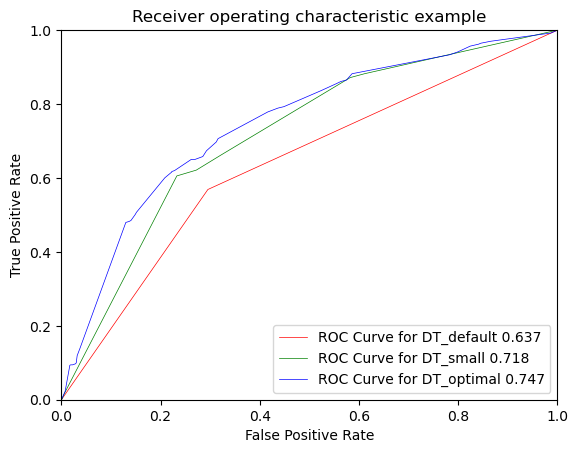

In [30]:
import matplotlib.pyplot as plt

plt.plot(fpr_dt, tpr_dt, label='ROC Curve for DT_default {:.3f}'.format(roc_index_dt), color='red', lw=0.5)
plt.plot(fpr_dt_small, tpr_dt_small, label='ROC Curve for DT_small {:.3f}'.format(roc_index_dt_small), color='green', lw=0.5)
plt.plot(fpr_dt_cv, tpr_dt_cv, label='ROC Curve for DT_optimal {:.3f}'.format(roc_index_dt_cv), color='blue', lw=0.5)

#plt.plot([0, 1], [0, 1], color='navy', lw=0.5, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [31]:
import pandas as pd

# Assuming you have the DT_optimal model and the test dataset available

# Generate predicted probabilities for the test dataset
probs = dt_cv_best.predict_proba(X_test)[:, 1]  # Assuming the positive class is labeled as 1

# Set the desired threshold for classification
threshold = 0.5  # Adjust the threshold as needed

# Classify individuals as "COVID positive" or "COVID negative" based on the threshold
predictions = (probs > threshold).astype(int)

# Create a DataFrame to store the characteristics of "COVID positive" individuals
covid_positive_df = pd.DataFrame(data=X_test[predictions == 1], columns=[f"feature_{i}" for i in range(X_test.shape[1])])

# Print general characteristics of "COVID positive" individuals
print("Characteristics of individuals potentially COVID positive:")
print(covid_positive_df.describe())


Characteristics of individuals potentially COVID positive:
        feature_0   feature_1   feature_2   feature_3   feature_4   feature_5  \
count  681.000000  681.000000  681.000000  681.000000  681.000000  681.000000   
mean   170.229075   88.581498    0.961821    0.045521    8.014684    3.138032   
std     10.940230   25.594396    0.191769    0.208598    7.036444    1.727385   
min    122.000000   44.000000    0.000000    0.000000    0.000000    1.000000   
25%    164.000000   70.000000    1.000000    0.000000    3.000000    2.000000   
50%    170.000000   84.000000    1.000000    0.000000    5.000000    3.000000   
75%    178.000000  102.000000    1.000000    0.000000   10.000000    4.000000   
max    228.000000  180.000000    1.000000    1.000000   21.000000   11.000000   

        feature_6   feature_7   feature_8   feature_9  ...  feature_63  \
count  681.000000  681.000000  681.000000  681.000000  ...  681.000000   
mean     0.560940    0.433186    0.005874    0.001468  ...    0

In [32]:
import pickle
dt_best = cv_1
with open('DT.pickle', 'wb') as f:
    pickle.dump([dt_best,roc_index_dt_cv, fpr_dt_cv, tpr_dt_cv], f)

In [33]:

# Open the file
with open('dt.pickle', 'rb') as file:
    # Load the data from the file
    dt_model = pickle.load(file)


In [34]:
dt_model

[GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=10),
              param_grid={'criterion': ['gini', 'entropy'],
                          'max_depth': range(1, 16),
                          'min_samples_leaf': range(5, 25, 5)},
              return_train_score=True),
 0.7472795531656888,
 array([0.        , 0.00747664, 0.01682243, 0.01682243, 0.01869159,
        0.02242991, 0.02803738, 0.02990654, 0.0317757 , 0.03738318,
        0.12990654, 0.1364486 , 0.14018692, 0.14859813, 0.15140187,
        0.20841121, 0.22242991, 0.22242991, 0.22803738, 0.26168224,
        0.26915888, 0.28504673, 0.29252336, 0.31214953, 0.31588785,
        0.41588785, 0.4364486 , 0.44859813, 0.52336449, 0.55327103,
        0.5635514 , 0.57476636, 0.58598131, 0.78224299, 0.79906542,
        0.82429907, 0.8411215 , 0.84579439, 0.86542056, 0.98691589,
        1.        ]),
 array([0.        , 0.02228047, 0.09174312, 0.09305374, 0.09436435,
        0.09436435, 0.09698558, 0.09960682, 0.11926606, 